# Assignment -5-part-e- Bitcoin Price Prediction



In [3]:
!pip install -Uqq nixtla cryptocmd

In [4]:
import pandas as pd
from nixtla import NixtlaClient
from nixtla.utils import in_colab
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')

In [5]:
IN_COLAB = in_colab()

In [6]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')
df.head()

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [8]:
import pandas as pd

# Load a time-series dataset for daily minimum temperatures
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', sep=',')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


In [15]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

### Get Started with TimeGPT

In [16]:
from nixtla import NixtlaClient

In [17]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

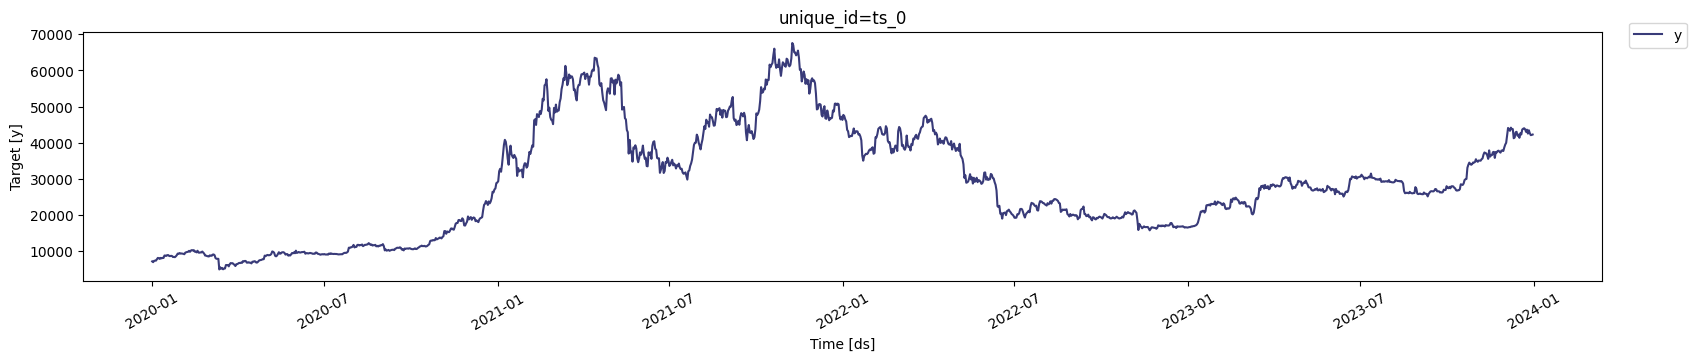

In [18]:
nixtla_client.plot(df)

### Forecast with TimeGPT

In [25]:
level = [20,10,66] # confidence levels

fcst = nixtla_client.forecast(df, h=7, level=level)
fcst.head()

,ds,TimeGPT,TimeGPT-hi-10,TimeGPT-hi-20,TimeGPT-hi-66,TimeGPT-lo-10,TimeGPT-lo-20,TimeGPT-lo-66
0,2024-01-01,42269.460,42502.453,42648.250,43298.543,42036.470,41890.670,41240.380
1,2024-01-02,42469.918,42598.293,42684.750,43822.223,42341.543,42255.086,41117.613
2,2024-01-03,42864.080,43059.850,43096.600,43795.793,42668.305,42631.555,41932.363
3,2024-01-04,42881.620,43045.780,43206.062,44265.090,42717.460,42557.180,41498.152
4,2024-01-05,42773.457,43400.758,43512.984,44594.176,42146.156,42033.930,40952.740


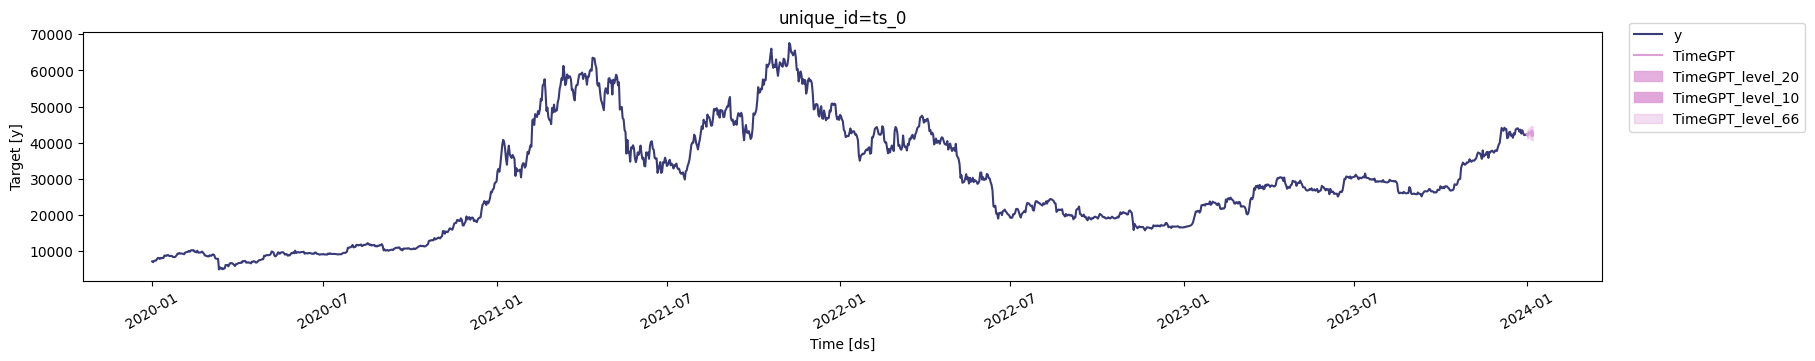

In [26]:
nixtla_client.plot(df, fcst, level=level)

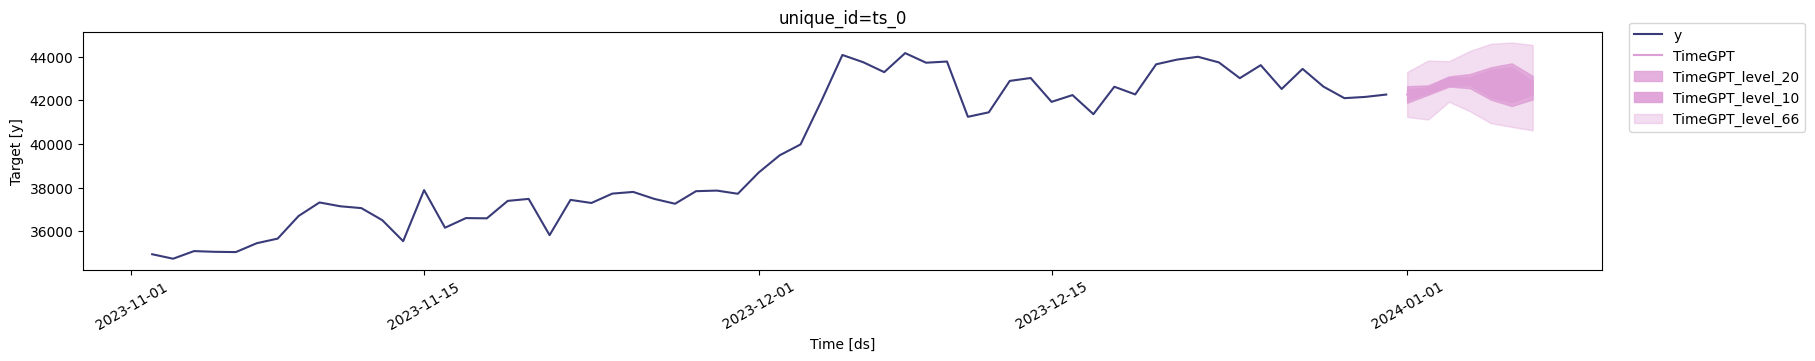

In [27]:
nixtla_client.plot(df, fcst, level=level, max_insample_length=60)

In [28]:
forecast = nixtla_client.forecast(df, h=7, level=level, add_history=True)
forecast.head()

,ds,TimeGPT,TimeGPT-hi-10,TimeGPT-hi-20,TimeGPT-hi-66,TimeGPT-lo-10,TimeGPT-lo-20,TimeGPT-lo-66
0,2020-02-03,9425.707,9761.727,10103.160,11977.155,9089.6875,8748.254,6874.2583
1,2020-02-04,9568.495,9904.515,10245.948,12119.943,9232.4760,8891.042,7017.0464
2,2020-02-05,9557.106,9893.126,10234.560,12108.555,9221.0870,8879.653,7005.6577
3,2020-02-06,9486.127,9822.146,10163.580,12037.575,9150.1070,8808.674,6934.6780
4,2020-02-07,9475.245,9811.265,10152.698,12026.693,9139.2260,8797.792,6923.7964


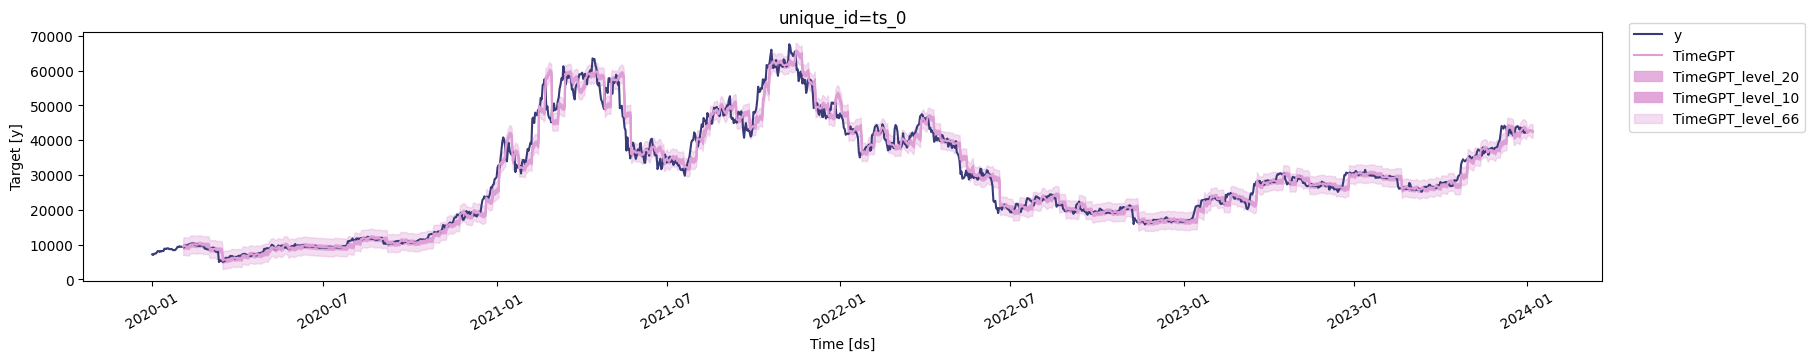

In [29]:
nixtla_client.plot(df, forecast, level=level)

### Extend  Analysis with TimeGPT

In [30]:
anomalies_df = nixtla_client.detect_anomalies(df)

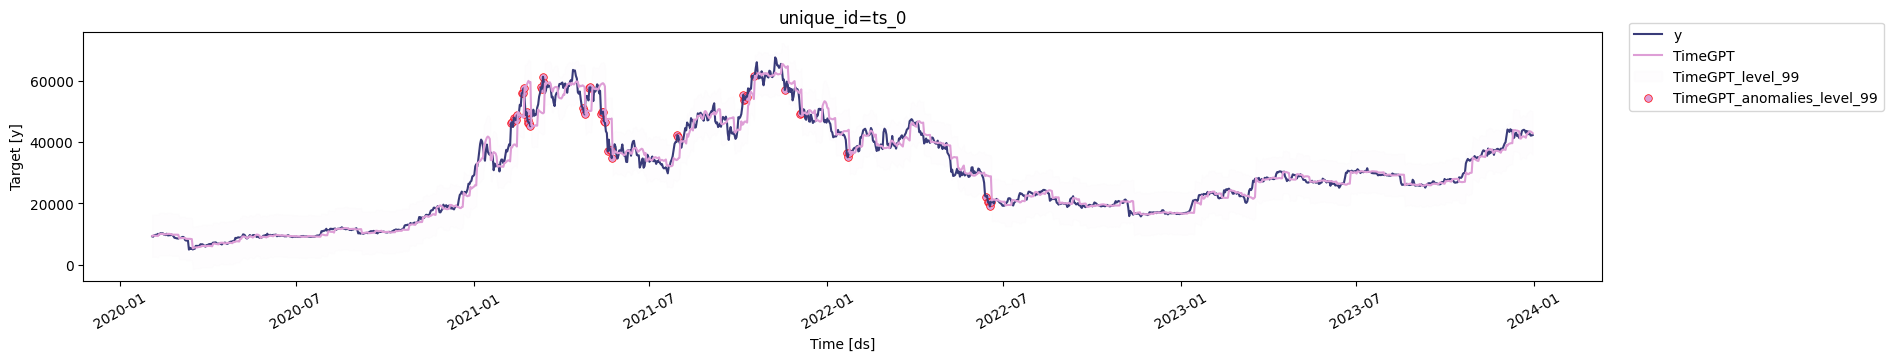

In [31]:
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)